In [17]:
'''
NAMA: AURELIA REGITA CAHYANI
NIM : 12220053
'''
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import urllib.request, urllib.parse, urllib.error
import json
import ssl
import string
from matplotlib.colors import ListedColormap


In [18]:
filepath = "produksi_minyak_mentah.csv"
data = pd.read_csv(filepath)

f=open('kode_negara_lengkap.json', "r")
ref=json.loads(f.read())

In [19]:
kode_negara=[]
negara=[]
region=[]
sub_region=[]

for item in ref:
    kode_negara.append(item['alpha-3'])
    negara.append(item['name'])
    region.append(item['region'])
    sub_region.append(item['sub-region'])
    
trans_negara=dict(zip(kode_negara,negara))
region_negara=dict(zip(kode_negara,region))
subreg_negara=dict(zip(kode_negara,sub_region))

In [20]:
#membuat daftar negara dan tahun yg ada di csv
list_negara=[]
list_tahun=[]
df = pd.DataFrame(data, columns= ['kode_negara','tahun','produksi'])

for key,val in trans_negara.items():
    for i in df['kode_negara']:
        if i==key:
            neg=val
            if neg not in list_negara:
                list_negara.append(neg)

for i in df['tahun']:
    if i not in list_tahun:
        list_tahun.append(i)

<function matplotlib.pyplot.show(close=None, block=None)>

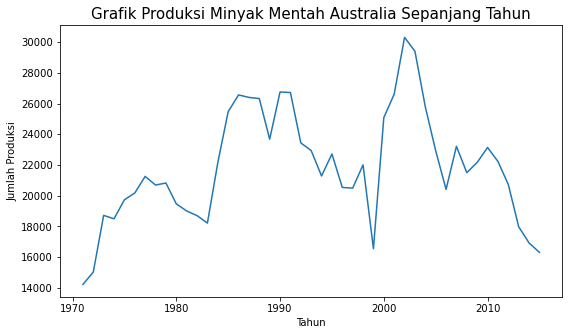

In [107]:
#soal 1 (grafik produksi tiap tahun negara x)
#membuat dataframe baru
data1 = pd.read_csv(filepath, index_col="kode_negara")
df1 = pd.DataFrame(data1, columns= ['tahun','produksi'])

#data yang diminta
neg='Australia'

#memilih negara di data
for key,val in trans_negara.items():
    if neg==val:
        kode=key
df1=data1.loc[[kode]]

#plot
fig=plt.figure(figsize=(9,5))
plt.plot(df1['tahun'], df1['produksi'])
plt.title("Grafik Produksi Minyak Mentah "+ neg +" Sepanjang Tahun" , fontsize=15)
plt.xlabel("Tahun")
plt.ylabel("Jumlah Produksi")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

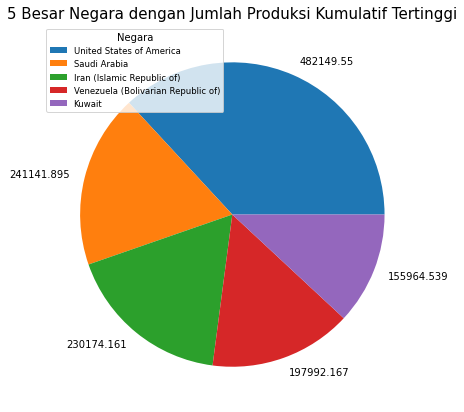

In [96]:
#soal 2 (5 besar negara dengan produksi tertinggi tahun x)
#membuat dataframe baru
data2 = pd.read_csv(filepath, index_col="tahun")
df2 = pd.DataFrame(data2, columns= ['kode_negara','produksi'])

#menghapus data yang bukan milik negara tunggal
negara=[]
for i in trans_negara:
    daftar_kode=list(trans_negara.keys())
for i in df2['kode_negara']: 
    if i in daftar_kode:
        for key,val in trans_negara.items():
            if i==key:
                name=val
    else:
        name=np.nan
    negara.append(name)

df2['negara']=negara
df2=df2.dropna()

#data yg diminta
thn=int(1971)
n=5

#memilih tahun dan n data terbesar
df2=df2.loc[[thn]]
sort_produksi=df2.sort_values(['produksi','negara'], ascending=False)
great_n=sort_produksi.iloc[0:n] 

#plot
fig=plt.figure(figsize=(10,7))
plt.pie(great_n['produksi'],labels=great_n['produksi'])
plt.legend(great_n['negara'],title="Negara", fontsize=8.5, loc=2)
plt.title(str(n)+" Besar Negara dengan Jumlah Produksi Kumulatif Tertinggi", fontsize=15)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

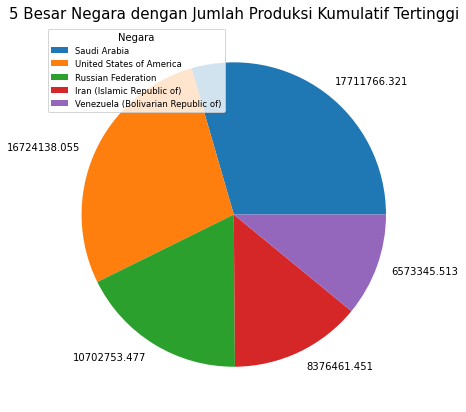

In [101]:
#soal 3 (5 besar negara dengan produksi kumulatif tertinggi)
#membuat dataframe baru
data3 = pd.read_csv(filepath)
df3 = pd.DataFrame(data3, columns= ['kode_negara','produksi'])

#menghapus data yang bukan milik negara tunggal
negara=[]
for i in trans_negara:
    daftar_kode=list(trans_negara.keys())
    
for i in df3['kode_negara']: 
    if i in daftar_kode:
        for key,val in trans_negara.items():
            if i==key:
                name=val
    else:
        name=np.nan
    negara.append(name)

df3['negara']=negara
df3=df3.dropna()

#menghitung kumulasi
df3['total'] = df3.groupby(['negara'])['produksi'].transform('sum')
new_df = df3.drop_duplicates(subset=['negara'])

#data yg diminta
n=5

#memilih n data terbesar
sort_produksi=new_df.sort_values(['total'], ascending=False)
great=sort_produksi.iloc[0:n]

#plot
fig=plt.figure(figsize=(10,7))
plt.pie(great['total'],labels=great['total'])
plt.legend(great['negara'],title="Negara", fontsize=8.5, loc=2)
plt.title(str(n)+" Besar Negara dengan Jumlah Produksi Kumulatif Tertinggi", fontsize=15)
plt.show

In [109]:
#soal 4.1 (daftar negara dengan produksi terbesar tiap tahun)
#membuat dataframe baru
data4 = pd.read_csv(filepath, index_col="tahun")
df4 = pd.DataFrame(data4, columns= ['kode_negara','produksi'])

#menghapus data yang bukan milik negara perseorangan
negara=[]
for i in trans_negara:
    daftar_kode=list(trans_negara.keys())
    
for i in df4['kode_negara']: 
    if i in daftar_kode:
        for key,val in trans_negara.items():
            if i==key:
                name=val
    else:
        name=np.nan
    negara.append(name)

df4['negara']=negara
df4=df4.dropna()

#menambahkan region
reg=[]
for i in df4['kode_negara']: 
    for key,val in region_negara.items():
        if i==key:
            name=val
    reg.append(name)
df4['region']=reg

#menambahkan region
subreg=[]
for i in df4['kode_negara']: 
    for key,val in subreg_negara.items():
        if i==key:
            name=val
    subreg.append(name)
df4['sub-region']=subreg

#daftar negara dengan produksi terbesar sepanjang tahun
terbesar=pd.DataFrame()
for i in list_tahun:
    df_new=df4.loc[[i]]
    sort_produksi=df_new.sort_values(['produksi'], ascending=False)
    great=sort_produksi.iloc[0:1]
    terbesar=terbesar.append(great,ignore_index=False)

terbesar=terbesar.sort_values(['produksi'], ascending=False)

print("Daftar Negara dengan Produksi Minyak Terbesar Sepanjang Tahun")
display(terbesar)

#negara dengan produksi terbesar tahun x
thn=1971
max_x=terbesar.loc[[thn]]

Daftar Negara dengan Produksi Minyak Terbesar Sepanjang Tahun


,kode_negara,produksi,negara,region,sub-region
tahun,,,,,
2015,SAU,523088.977,Saudi Arabia,Asia,Western Asia
1990,RUS,516040.215,Russian Federation,Europe,Eastern Europe
1980,SAU,511333.695,Saudi Arabia,Asia,Western Asia
2014,RUS,505603.375,Russian Federation,Europe,Eastern Europe
1981,SAU,500792.799,Saudi Arabia,Asia,Western Asia
2013,RUS,499966.375,Russian Federation,Europe,Eastern Europe
2012,RUS,499908.086,Russian Federation,Europe,Eastern Europe
2011,RUS,494392.690,Russian Federation,Europe,Eastern Europe
2010,RUS,487106.499,Russian Federation,Europe,Eastern Europe


In [43]:
#soal 4.2 (negara dengan produksi terkecil tiap tahun yang bukan nol)
#membuat dataframe baru
data4 = pd.read_csv(filepath)
df4 = pd.DataFrame(data4, columns= ['tahun','kode_negara','produksi'])
delete=df4[df4['produksi']==0].index
df4.drop(delete, inplace=True)
df4.set_index('tahun',inplace=True)

terkecil=pd.DataFrame()

#menghapus data yang bukan milik negara perseorangan
negara=[]
for i in trans_negara:
    daftar_kode=list(trans_negara.keys())
    
for i in df4['kode_negara']: 
    if i in daftar_kode:
        for key,val in trans_negara.items():
            if i==key:
                name=val
    else:
        name=np.nan
    negara.append(name)

df4['negara']=negara
df4=df4.dropna()

#menambahkan region
reg=[]
for i in df4['kode_negara']: 
    for key,val in region_negara.items():
        if i==key:
            name=val
    reg.append(name)
df4['region']=reg

#menambahkan sub-region
subreg=[]
for i in df4['kode_negara']: 
    for key,val in subreg_negara.items():
        if i==key:
            name=val
    subreg.append(name)
df4['sub-region']=subreg

#daftar negara dengan produksi terkecil sepanjang tahun
for i in list_tahun:
    df_new=df4.loc[[i]]
    sort_produksi=df_new.sort_values(['produksi'], ascending=True)
    small=sort_produksi.iloc[:1]
    terkecil=terkecil.append(small,ignore_index=False)

terkecil=terkecil.sort_values(['produksi'], ascending=True)

print("Daftar Negara dengan Produksi Minyak Terkecil (tidak nol) Sepanjang Tahun")
display(terkecil)

#negara dengan produksi terkecil tahun x
thn=2002
min_x=terkecil.loc[[thn]]

Daftar Negara dengan Produksi Minyak Terkecil (tidak nol) Sepanjang Tahun


,kode_negara,produksi,negara,region,sub-region
tahun,,,,,
2000,SVN,0.994,Slovenia,Europe,Southern Europe
2002,SVN,0.994,Slovenia,Europe,Southern Europe
1992,SWE,1.007,Sweden,Europe,Northern Europe
1977,SWE,1.007,Sweden,Europe,Northern Europe
1978,SWE,1.007,Sweden,Europe,Northern Europe
1979,SWE,1.007,Sweden,Europe,Northern Europe
1993,SEN,1.018,Senegal,Africa,Sub-Saharan Africa
1996,SEN,1.018,Senegal,Africa,Sub-Saharan Africa
1991,SEN,1.018,Senegal,Africa,Sub-Saharan Africa


In [46]:
#soal 4.3 (nol tiap tahun)
#membuat dataframe baru
data4 = pd.read_csv(filepath, index_col="tahun")
df4 = pd.DataFrame(data4, columns= ['kode_negara','produksi'])

#menghapus data yang bukan milik negara perseorangan
negara=[]
for i in trans_negara:
    daftar_kode=list(trans_negara.keys())
    
for i in df4['kode_negara']: 
    if i in daftar_kode:
        for key,val in trans_negara.items():
            if i==key:
                name=val
    else:
        name=np.nan
    negara.append(name)

df4['negara']=negara
df4=df4.dropna()

#menambahkan region
reg=[]
for i in df4['kode_negara']: 
    for key,val in region_negara.items():
        if i==key:
            name=val
    reg.append(name)
df4['region']=reg

#menambahkan sub-region
subreg=[]
for i in df4['kode_negara']: 
    for key,val in subreg_negara.items():
        if i==key:
            name=val
    subreg.append(name)
df4['sub-region']=subreg

#daftar negara dengan dengan produksi nol sepanjang tahun
nol=df4[df4.produksi==0]

print("Daftar Negara dengan Produksi Minyak Nol Sepanjang Tahun")
display(nol)

#negara dengan produksi nol tahun x
thn=1971
nol_x=nol.loc[[thn]]

print("Daftar Negara dengan Produksi Minyak Nol pada Tahun " + str(thn))
display(nol_x)

Daftar Negara dengan Produksi Minyak Nol Sepanjang Tahun


,kode_negara,produksi,negara,region,sub-region
tahun,,,,,
1971,BEL,0.0,Belgium,Europe,Western Europe
1972,BEL,0.0,Belgium,Europe,Western Europe
1973,BEL,0.0,Belgium,Europe,Western Europe
1974,BEL,0.0,Belgium,Europe,Western Europe
1975,BEL,0.0,Belgium,Europe,Western Europe
...,...,...,...,...,...
2011,ZWE,0.0,Zimbabwe,Africa,Sub-Saharan Africa
2012,ZWE,0.0,Zimbabwe,Africa,Sub-Saharan Africa
2013,ZWE,0.0,Zimbabwe,Africa,Sub-Saharan Africa


Daftar Negara dengan Produksi Minyak Nol pada Tahun 1971


,kode_negara,produksi,negara,region,sub-region
tahun,,,,,
1971,BEL,0.0,Belgium,Europe,Western Europe
1971,DNK,0.0,Denmark,Europe,Northern Europe
1971,FIN,0.0,Finland,Europe,Northern Europe
1971,GRC,0.0,Greece,Europe,Southern Europe
1971,ISL,0.0,Iceland,Europe,Northern Europe
1971,IRL,0.0,Ireland,Europe,Northern Europe
1971,KOR,0.0,"Korea, Republic of",Asia,Eastern Asia
1971,LUX,0.0,Luxembourg,Europe,Western Europe
1971,NZL,0.0,New Zealand,Oceania,Australia and New Zealand


In [62]:
#soal 4.1.1 (kumulatif)
#membuat dataframe baru
data5 = pd.read_csv(filepath)
df5 = pd.DataFrame(data5, columns= ['kode_negara','produksi'])

#menghapus data yang bukan milik negara perseorangan
negara=[]
for i in trans_negara:
    daftar_kode=list(trans_negara.keys())
    
for i in df5['kode_negara']: 
    if i in daftar_kode:
        for key,val in trans_negara.items():
            if i==key:
                name=val
    else:
        name=np.nan
    negara.append(name)

df5['negara']=negara
df5=df5.dropna()

#menambahkan region
reg=[]
for i in df5['kode_negara']: 
    for key,val in region_negara.items():
        if i==key:
            name=val
    reg.append(name)
df5['region']=reg

#menambahkan sub-region
subreg=[]
for i in df5['kode_negara']: 
    for key,val in subreg_negara.items():
        if i==key:
            name=val
    subreg.append(name)
df5['sub-region']=subreg

#membuat kumulasi data
df5['total'] = df5.groupby(['negara'])['produksi'].transform('sum')
new_df = df5.drop_duplicates(subset=['negara'])
new_df.set_index('kode_negara',inplace=True)

print("Daftar Produksi Kumulatif Minyak")
display(new_df)

#memilih data produksi kumulatif terbesar 
sort_produksi1=new_df.sort_values(['total'], ascending=False)
max_kumulatif=sort_produksi1.iloc[0:1]

#memilih data produksi kumulatif terkecil tak nol 
sort_produksi2=new_df.sort_values(['total'], ascending=True)
delete=sort_produksi2[sort_produksi2['produksi']==0].index
sort_produksi2.drop(delete, inplace=True)
min_kumulatif=sort_produksi2.iloc[0:1]

#data dengan produksi kumulatif nol
nol_kumulatif=new_df[new_df.total==0]
print("Daftar Negara dengan Produksi Kumulatif Minyak Nol")
display(nol_kumulatif)
#print(nol_kumulatif.to_string(index=False))

Daftar Produksi Kumulatif Minyak


,produksi,negara,region,sub-region,total
kode_negara,,,,,
AUS,14226.194,Australia,Oceania,Australia and New Zealand,983345.159
AUT,2628.081,Austria,Europe,Western Europe,57109.199
BEL,0.000,Belgium,Europe,Western Europe,0.000
CAN,67007.824,Canada,Americas,Northern America,3973083.387
CZE,34.930,Czechia,Europe,Eastern Europe,5747.022
...,...,...,...,...,...
TKM,3768.720,Turkmenistan,Asia,Central Asia,206885.619
UZB,2813.977,Uzbekistan,Asia,Central Asia,139132.079
VEN,197992.167,Venezuela (Bolivarian Republic of),Americas,Latin America and the Caribbean,6573345.513


Daftar Negara dengan Produksi Kumulatif Minyak Nol


,produksi,negara,region,sub-region,total
kode_negara,,,,,
BEL,0.0,Belgium,Europe,Western Europe,0.0
FIN,0.0,Finland,Europe,Northern Europe,0.0
ISL,0.0,Iceland,Europe,Northern Europe,0.0
IRL,0.0,Ireland,Europe,Northern Europe,0.0
LUX,0.0,Luxembourg,Europe,Western Europe,0.0
PRT,0.0,Portugal,Europe,Southern Europe,0.0
CHE,0.0,Switzerland,Europe,Western Europe,0.0
ARM,0.0,Armenia,Asia,Western Asia,0.0
BIH,0.0,Bosnia and Herzegovina,Europe,Southern Europe,0.0


In [56]:
#extract data dari excel dan buat summary
neg_max=max_x['negara'].to_string(index=False,header=False)
subreg_max=max_x['sub-region'].to_string(index=False,header=False)
reg_max=max_x['region'].to_string(index=False,header=False)
kode_max=max_x['kode_negara'].to_string(index=False,header=False)
prod_max=max_x['produksi'].to_string(index=False,header=False)
print("Negara dengan produksi minyak terbesar pada tahun " + str(thn) + " adalah " + neg_max + " (" + kode_max +")" + ', Region '+ reg_max +', Sub-region ' + subreg_max + ", dengan jumlah produksi " + prod_max +"\n")

neg_min=min_x['negara'].to_string(index=False,header=False)
subreg_min=min_x['sub-region'].to_string(index=False,header=False)
reg_min=min_x['region'].to_string(index=False,header=False)
kode_min=min_x['kode_negara'].to_string(index=False,header=False)
prod_min=min_x['produksi'].to_string(index=False,header=False)
print("Negara dengan produksi minyak terkecil pada tahun " + str(thn) + " adalah " + neg_min + " (" + kode_min+")" + ', Region '+ reg_min +', Sub-region ' + subreg_min + ", dengan jumlah produksi " + prod_min+"\n")

neg_max_kum=max_kumulatif['negara'].to_string(index=False,header=False)
subreg_max_kum=max_kumulatif['sub-region'].to_string(index=False,header=False)
reg_max_kum=max_kumulatif['region'].to_string(index=False,header=False)
kode_max_kum=max_kumulatif['kode_negara'].to_string(index=False,header=False)
prod_max_kum=max_kumulatif['total'].to_string(index=False,header=False)
print("Negara dengan produksi kumulatif minyak terkecil adalah " + neg_max_kum + " (" + kode_max_kum+")" + ', Region '+ reg_max_kum +', Sub-region ' + subreg_max_kum + ", dengan jumlah produksi kumulatif " + prod_max_kum+"\n")

neg_min_kum=min_kumulatif['negara'].to_string(index=False,header=False)
subreg_min_kum=min_kumulatif['sub-region'].to_string(index=False,header=False)
reg_min_kum=min_kumulatif['region'].to_string(index=False,header=False)
kode_min_kum=min_kumulatif['kode_negara'].to_string(index=False,header=False)
prod_min_kum=min_kumulatif['total'].to_string(index=False,header=False)
print("Negara dengan produksi kumulatif minyak terkecil adalah " + neg_min_kum + " (" + kode_min_kum+")" + ', Region '+ reg_min_kum +', Sub-region ' + subreg_min_kum + ", dengan jumlah produksi kumulatif " + prod_min_kum+"\n")


Negara dengan produksi minyak terbesar pada tahun 1971 adalah United States of America (USA), Region Americas, Sub-region Northern America, dengan jumlah produksi 482149.55

Negara dengan produksi minyak terkecil pada tahun 1971 adalah Slovenia (SVN), Region Europe, Sub-region Southern Europe, dengan jumlah produksi 0.994

Negara dengan produksi kumulatif minyak terkecil adalah Saudi Arabia (SAU), Region Asia, Sub-region Western Asia, dengan jumlah produksi kumulatif 17711766.321

Negara dengan produksi kumulatif minyak terkecil adalah Slovenia (SVN), Region Europe, Sub-region Southern Europe, dengan jumlah produksi kumulatif 19.435

